In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree


## Data PreProcessing

Comparing regression and classification models, which model performs well in predicting the daily
cases for <br>
(i) Pahang<br>
(ii) Kedah<br>
(iii) Johor<br>
(iv) Selangor


In [2]:
df = pd.read_csv('cases_state.csv')
#Pahang, Kedah, Johor, Selangor
data = df.loc[(df['state'] == 'Pahang') | (df['state'] == 'Kedah') | (df['state'] == 'Johor') | (df['state'] == 'Selangor')]
data.head()

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020-01-25,Johor,4,4,0,4,0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-25,Pahang,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2020-01-25,Selangor,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2020-01-26,Johor,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = df[df.state.isin(data)]

## Classification Model 

In [4]:
# Convert date column to datetime object
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# Extract day, month, and year from date column
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Select required columns and set them as features
features = ['day', 'month', 'year', 'state', 'cases_new']
X = data[features]

In [5]:
# Convert state column into numerical value
X['state'] = X['state'].astype('category')
X['state'] = X['state'].cat.codes
print(X['state'])

0        0
1        1
5        2
11       3
16       0
        ..
19483    3
19488    0
19489    1
19493    2
19499    3
Name: state, Length: 4876, dtype: int8


C:\Users\ainna\AppData\Local\Temp\ipykernel_18256\3337899148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['state'] = X['state'].astype('category')
C:\Users\ainna\AppData\Local\Temp\ipykernel_18256\3337899148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['state'] = X['state'].cat.codes


In [6]:
# Set daily cases as target variable
y = data['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Decision Tree

In [7]:
# Create decision tree classifier object
dtc = DecisionTreeClassifier()

# Train the model
dtc.fit(X_train, y_train)

# Predict the target variable for test set
y_pred = dtc.predict(X_test)

# Calculate the accuracy score
dtc_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Decision Tree Classifier Accuracy:', dtc_accuracy)

Decision Tree Classifier Accuracy: 1.0


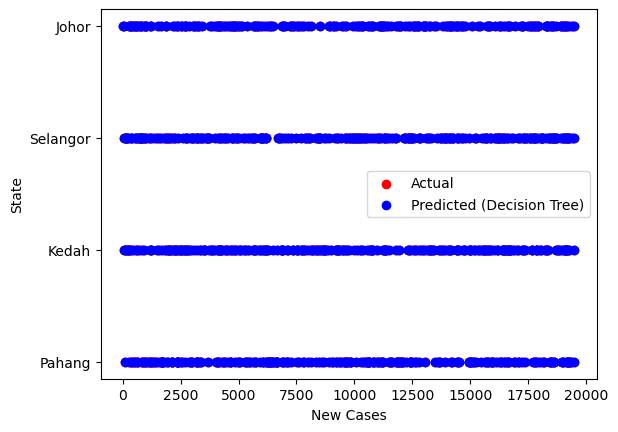

In [8]:
# Visualizing Model Predictions
plt.scatter(X_test.index, y_test, color='red', label='Actual')
plt.scatter(X_test.index, dtc.predict(X_test), color='blue', label='Predicted (Decision Tree)')
plt.legend()
plt.xlabel('New Cases')
plt.ylabel('State')
plt.show()

In [9]:
# Decision Tree Classifier
y_pred = dtc.predict(X_test)
print('Decision Tree Classifier')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Decision Tree Classifier
Confusion Matrix:
[[214   0   0   0]
 [  0 262   0   0]
 [  0   0 232   0]
 [  0   0   0 268]]
Classification Report:
              precision    recall  f1-score   support

       Johor       1.00      1.00      1.00       214
       Kedah       1.00      1.00      1.00       262
      Pahang       1.00      1.00      1.00       232
    Selangor       1.00      1.00      1.00       268

    accuracy                           1.00       976
   macro avg       1.00      1.00      1.00       976
weighted avg       1.00      1.00      1.00       976



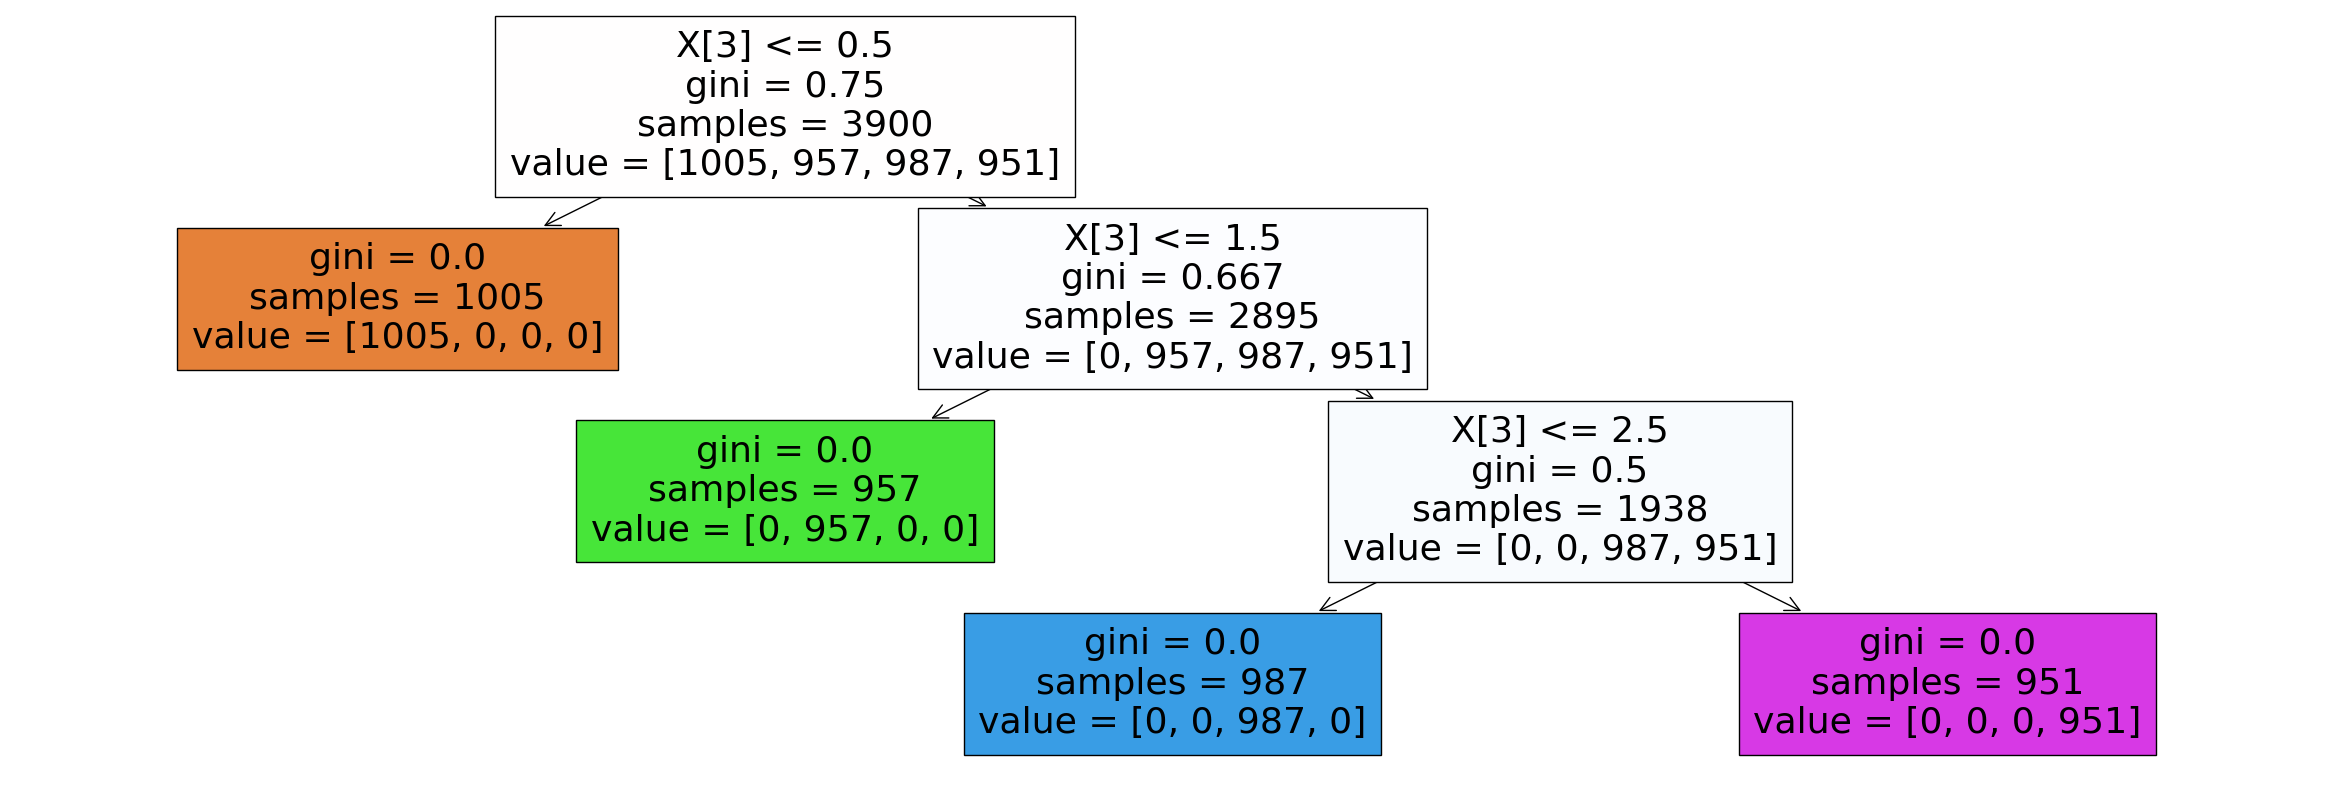

In [10]:
plt.figure(figsize=(30, 10))
plot_tree(dtc, filled=True)
plt.show()

In [11]:
# Modifying decision tree parameters
# entropy

clf = DecisionTreeClassifier(criterion="entropy", max_depth=2) #pruning the tree by setting the depth

# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)

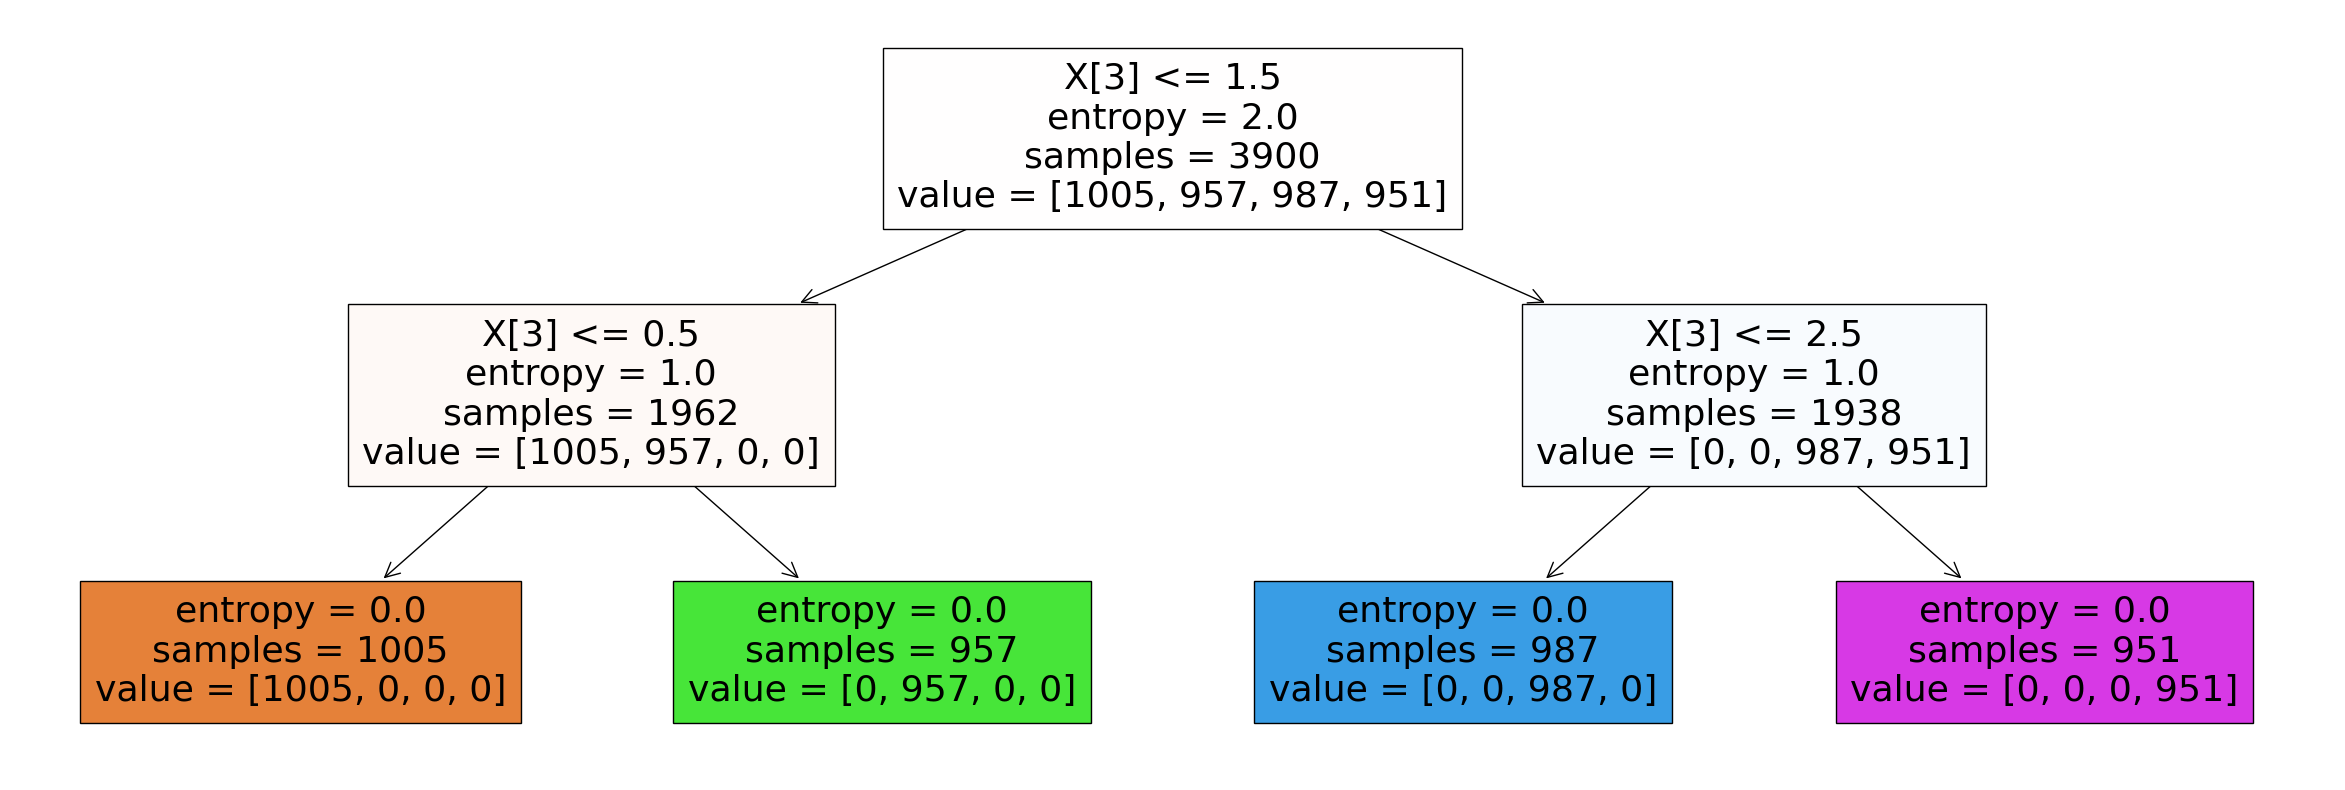

In [12]:
plt.figure(figsize=(30, 10))
plot_tree(clf, filled=True)
plt.show()

### K-Neighbours

In [13]:
# Create K-Neighbors classifier object
knc = KNeighborsClassifier()
# Train the model
knc.fit(X_train, y_train)

# Predict the target variable for test set
y_pred = knc.predict(X_test)

# Calculate the accuracy score
knc_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('K_Neighbor Classifier Accuracy:', knc_accuracy)

K_Neighbor Classifier Accuracy: 0.492827868852459


c:\Users\ainna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


c:\Users\ainna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


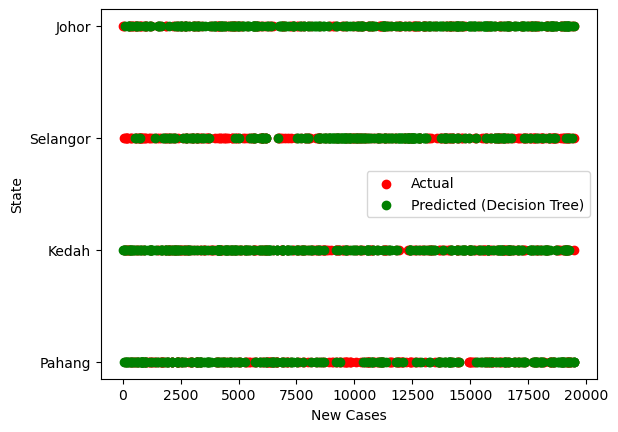

In [14]:
# Visualizing Model Predictions
plt.scatter(X_test.index, y_test, color='red', label='Actual')
plt.scatter(X_test.index, knc.predict(X_test), color='green', label='Predicted (Decision Tree)')
plt.legend()
plt.xlabel('New Cases')
plt.ylabel('State')
plt.show()

In [15]:
# K-Neighbors Classifier
y_pred = knc.predict(X_test)
print('K-Neighbors Classifier')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

K-Neighbors Classifier
Confusion Matrix:
[[113  51  17  33]
 [ 78 121  44  19]
 [ 26  64 117  25]
 [ 45  44  49 130]]
Classification Report:
              precision    recall  f1-score   support

       Johor       0.43      0.53      0.47       214
       Kedah       0.43      0.46      0.45       262
      Pahang       0.52      0.50      0.51       232
    Selangor       0.63      0.49      0.55       268

    accuracy                           0.49       976
   macro avg       0.50      0.49      0.49       976
weighted avg       0.51      0.49      0.50       976



c:\Users\ainna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


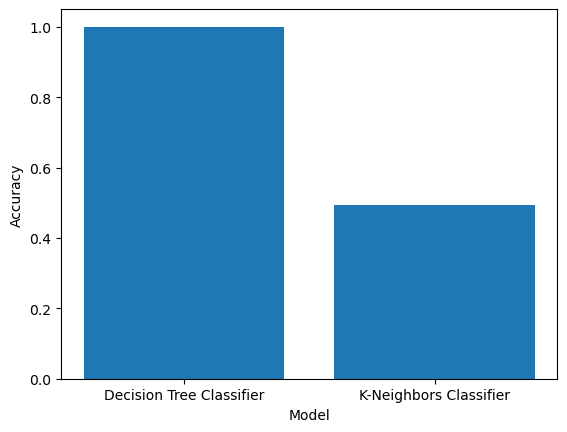

In [16]:
# Create a bar chart
plt.bar(['Decision Tree Classifier', 'K-Neighbors Classifier'], [dtc_accuracy, knc_accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()